# Regresión lineal y el precio de una casa
En algunos proyectos anteriores hemos desarrollado modelos de _machine learning_. En el tercer proyecto desarrollamos un modelo de regresión logística para predecir qué pasajeros del Titanic sobrevivieron y cuáles no. Ahora haremos uso de un modelo de __regresión lineal__, el cual nos permitirá predecir un número, en este caso el precio de una casa.

La regresión lineal nos permite modelar la relación entre una variable dependiente (el precio de una casa para este proyecto) y una o más variable independientes (por ejemplo, sus metros cuadrados, habitaciones, zona, etc.) Su objetivo es encontrar la mejor línea recta que prediga el valor de la variable dependiente; ésta línea será graficada más adelante.

En el mundo del _machine learning_ a la variable dependiente, la que que queremos obtener, se le llama variable objetivo (en este caso el precio) y a las variables independientes se les llaman características. La regresión lineal es considerada aprendizaje supervisado, porque el modelo aprende viendo entradas de la variable objetivo (precio).

Muchos conceptos, lo sé, pero todos serán explicados con mayor profundidad.

## Preparación del entorno
Ya lo sabes, importemos las librerías necesarias. Los sospechosos habituales: `pandas`, `numpy`,`matplotlib` y `seaborn`.

Seguiremos utilizando `sklearn`. En esta ocasión importaremos: 

- `LinearRegression`, nuestra regresión lineal.
- `mean_square_error` y `r2_score` para calificar la precisión de nuestro modelo.
- `StandarScaler`, nuestro escalador para que nuestro modelo sea capaz de analizar de forma equilibrada las variables.
- `train_test_split`, para dividir en datos de entrenamiento y prueba.

In [1]:
# Importaremos las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Desde 'sklearn' importaremos los modelos de regresión lineal necesarios.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Simulación de nuestros datos
Esto ya lo hemos hecho varias veces. Nos apoyaremos de `numpy` y usaremos una semilla estandarizada para obtener resultados replicables. Las características serán cosas como los metros cuadrados, el número de baños, si tiene estacionamiento o no, etc.

In [2]:
# Una semilla fija.
np.random.seed(42)

# Simularemos 100 departamentos.
n = 100  

# Características (o variables independientes, como te decía).
metros = np.random.randint(60, 130, size=n) # Superficie de 60m² a 130m².
recamaras = np.random.randint(1, 4, size=n) # Recámaras de 1 a 3. 
baños = np.random.randint(1, 3, size=n) # Baños de 1 a 2.  
estacionamiento = np.random.randint(0, 2, size=n) # Estacionamiento, en binario: 0 o 1.
piso = np.random.randint(1, 7, size=n) # Número de pisos del 1 al 6.
antiguedad = np.random.randint(0, 50, size=n) # Años del edificio.

# Generar precio basado en una fórmula base más algo de ruido.
precio = (
    metros * 47000 +
    recamaras * 250000 +
    baños * 150000 +
    estacionamiento * 100000 -
    antiguedad * 15000 +
    piso * 10000 +
    np.random.normal(0, 150000, size=n)  # Ruido aleatorio.
)

# Crear DataFrame.
df = pd.DataFrame({
    'metros': metros,
    'recamaras': recamaras,
    'baños': baños,
    'estacionamiento': estacionamiento,
    'piso': piso,
    'antiguedad': antiguedad,
    'precio': precio
})

df.head()


,metros,recamaras,baños,estacionamiento,piso,antiguedad,precio
0,111,1,1,1,2,15,5.411620e+06
1,74,2,2,1,6,36,4.072291e+06
2,120,3,2,1,2,21,6.727929e+06
3,80,3,1,1,3,28,4.304072e+06
4,83,2,2,1,2,13,4.564813e+06


La información está lista.

## División y estandarización
¿Recuerdas que te hablaba de un escalador y de dividir los datos? Déjame explicarte: el escalador `StandardScaler` pone todas las variables en la misma escala, así las características con valores más grandes no dominan al resto ni confunden al modelo. La división de datos es necesaria para entrenar al modelo correctamente. Esto se realiza con la función `train_test_split`.

Estamos dividiendo los datos en dos partes: una para entrenar al modelo (`X_train`, `y_train`) y otra para probarlo (`X_test`, `y_test`).

In [3]:
# La variable `X` contiene las características y la variable `y` la variable objetivo, el precio.
X = df.drop('precio', axis=1)
y = df['precio']

# La información dividida.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nuestro escalador.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrenar al modelo
Con las variables listas y la información escalada, estamos listos para el entrenamiento y la predicción.

In [4]:
# Nuestro modelo listo para aprender de las variables escaladas.
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Las predicciones.
y_pred = model.predict(X_test_scaled)


Primero entregamos los datos de entrenamiento ya escalados (`X_train_scaled`, `y_train`) para que el modelo aprenda la relación entre las variables predictoras y el precio. Luego, usamos `model.predict(X_test_scaled)` para que el modelo estime los valores de precio de los datos de prueba, es decir, predecimos con el modelo ya entrenado. El modelo aprende y luego hace predicciones con datos que no ha visto antes.

## Evaluar el modelo
Como te decía, con `mean_square_error` y `r2_score` vamos a calificar la precisión de nuestro modelo.

El _mean squared error_ (MSE) mide el error promedio al cuadrado entre lo que el modelo predice y los valores reales: valores pequeños indican alta precisión.
El _r2 score_ muestra qué tan bien el modelo explica los datos: mientras más cerca de 1, mejor es el ajuste del modelo.

In [5]:
# MSE y r2.
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print()

# Ver coeficientes de forma tabular
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Impresión.
print(coef_df)

MSE: 15794986854.497477
R² Score: 0.9832150418767511

          Variable    Coeficiente
0           metros  983334.862221
5       antiguedad -225019.005204
1        recamaras  224970.158705
2            baños   64542.097255
3  estacionamiento   46539.949233
4             piso   11543.046699


Buenos resultados. Un _r2 score_ cercano a 1 y un _MSE_ que expresa el error cuadrático medio, aunque su valor absoluto depende de la escala del precio.

Analicemos las características y sus coeficientes. Los coeficientes muestran qué tanto influye cada características en el precio. Por ejemplo, metros y recámaras destacan en impacto positivo; antigüedad, lo contrario. Pero analicemos cada característica:

- Metros: por cada metro adicional, el precio aumenta mucho; es el factor con mayor peso.

- Antiguedad: por cada año más viejo, el precio baja bastante (por eso el coeficiente negativo).

- Recamaras: tener una recámara más incrementa el precio significativamente.

- Baños: más baños también suben el precio, aunque el impacto es menor.

- Estacionamiento: tener estacionamiento eleva el precio adicionalmente.

- Piso: a un número de pisos mayor, mayor precio , pero con influencia menor. ¿Raro, no? La influencia debería ser mayor. O eso es lo que me dice el sentido común.

## Visualizar resultados
Veamos eso de que la regresión lineal traza una línea que pretende predecir un número.

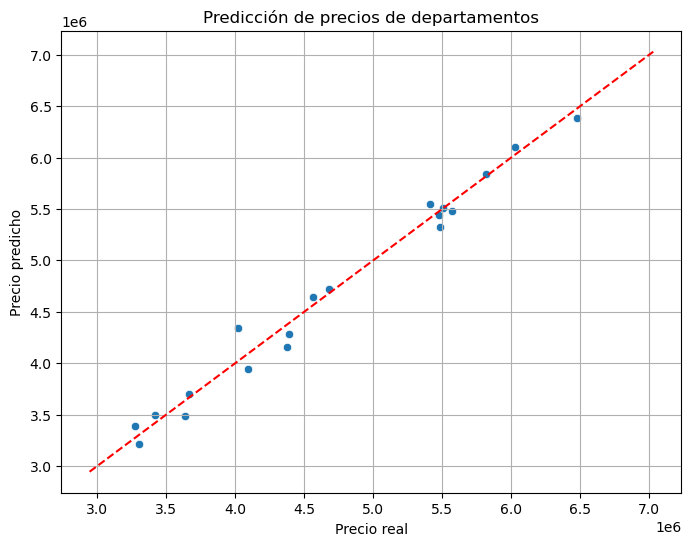

In [6]:
# Grafica e impresión.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicción de precios de departamentos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


Como puedes ver, el eje horizontal es el de los precios reales y el eje vertical el de los precios predichos. El modelo fue muy preciso. Los puntos, que serían la intersección entre precio real y predicho, están muy cerca de la línea que nuestro modelo desarrolló para predecir el precio. ¿Interesante, no?

## Conclusión
Cuando tenemos variables relacionadas de manera lineal no es necesario complicarse la vida. Un simple modelo de regresión lineal puede ser muy preciso. Lo acabamos de comprobar. ¿Pero qué pasaría cuando la relación entre variables no es lineal? ¿Qué pasaría si los datos siguen cualquier patrón que no sea recto? Lo adivinaste, la regresión lineal no sería precisa.

Por ejemplo, si analizas el crecimiento del interés compuesto en una inversión a renta fija por varias décadas, la relación es curva, no recta. Tampoco sirve para variables categóricas, patrones como la temperatura a lo largo del año, ni cuando hay muchas relaciones complejas. En futuros cuadernos analizaremos datos con patrones diferentes, no desesperes.